# Lending Club Case Study-Solution


In [862]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import style
import datetime as dt

In [863]:
df = pd.read_csv('loan.csv',encoding = "ISO-8859-1")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [864]:
print(df.shape)
df.describe()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,...,0.000,0.000,0.000,0.000,39020.000,39678.000,0.000,0.000,0.000,0.000
mean,683131.913,850463.559,11219.444,10947.713,10397.449,324.562,68968.926,13.315,0.147,0.869,...,NaN,NaN,NaN,NaN,0.043,0.000,NaN,NaN,NaN,NaN
std,210694.133,265678.307,7456.671,7187.239,7128.450,208.875,63793.766,6.679,0.492,1.070,...,NaN,NaN,NaN,NaN,0.204,0.000,NaN,NaN,NaN,NaN
min,54734.000,70699.000,500.000,500.000,0.000,15.690,4000.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
25%,516221.000,666780.000,5500.000,5400.000,5000.000,167.020,40404.000,8.170,0.000,0.000,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
50%,665665.000,850812.000,10000.000,9600.000,8975.000,280.220,59000.000,13.400,0.000,1.000,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
75%,837755.000,1047339.000,15000.000,15000.000,14400.000,430.780,82300.000,18.600,0.000,1.000,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
max,1077501.000,1314167.000,35000.000,35000.000,35000.000,1305.190,6000000.000,29.990,11.000,8.000,...,NaN,NaN,NaN,NaN,2.000,0.000,NaN,NaN,NaN,NaN


# 1. Data Cleaning :)

In [865]:
#finding missing values in % per column
missing = round(100*(df.isnull().sum()/len(df.id)), 2)
missing.loc[missing > 0]

emp_title                      6.190
emp_length                     2.710
desc                          32.580
title                          0.030
mths_since_last_delinq        64.660
                               ...  
tax_liens                      0.100
tot_hi_cred_lim              100.000
total_bal_ex_mort            100.000
total_bc_limit               100.000
total_il_high_credit_limit   100.000
Length: 68, dtype: float64

We observe that many columns in our dataset has 100% missing values. 
Lets remove all the columns with more than 50% missing values as imputing them makes the data biased.

In [866]:
#finding total no of columns with greater than/equal to 50% missing values
missing_columns = list(missing[missing >= 50].index)

len(missing_columns)

57

We observe that **57** columns have more than 50% missing values.

In [867]:
print("Actual Shape :",df.shape)

df = df.drop(missing_columns,axis=1)
print("Shape after removing missing values with >=50% :",df.shape)




Actual Shape : (39717, 111)
Shape after removing missing values with >=50% : (39717, 54)


We have **54** columns remaining now. Let's clean it up further :)

In [868]:
#Further looking into remaining miss values

missing_remaining = round(100*(df.isnull().sum()/len(df.id)), 2)
missing_remaining[missing_remaining != 0]

emp_title                     6.190
emp_length                    2.710
desc                         32.580
title                         0.030
revol_util                    0.130
last_pymnt_d                  0.180
last_credit_pull_d            0.010
collections_12_mths_ex_med    0.140
chargeoff_within_12_mths      0.140
pub_rec_bankruptcies          1.750
tax_liens                     0.100
dtype: float64

Let us remove the **desc** column, which comprises of the loan description provided by the borrower, as similar short and consise information is present in the **title** and **purpose** columns of the dataset.

In [869]:
#dropping the desc column
df = df.drop('desc',axis=1)

In [870]:
#Finding no. of unique values for the remaining columns:

print("no. of unique values for \"emp_title\" :",len(df.emp_title.unique()))
print("no. of unique values for \"emp_length\" :",len(df.emp_length.unique()))
print("no. of unique values for \"title\" :",len(df.title.unique()))
print("no. of unique values for \"revol_util\" :",len(df.revol_util.unique()))
print("no. of unique values for \"last_pymnt_d\" :",len(df.last_pymnt_d.unique()))
print("no. of unique values for \"last_credit_pull_d\" :",len(df.last_credit_pull_d.unique()))
print("no. of unique values for \"collections_12_mths_ex_med\" :",len(df.collections_12_mths_ex_med.unique()))
print("no. of unique values for \"chargeoff_within_12_mths\" :",len(df.chargeoff_within_12_mths.unique()))
print("no. of unique values for \"pub_rec_bankruptcies\" :",len(df.pub_rec_bankruptcies.unique()))
print("no. of unique values for \"tax_liens\" :",len(df.tax_liens.unique()))

no. of unique values for "emp_title" : 28821
no. of unique values for "emp_length" : 12
no. of unique values for "title" : 19616
no. of unique values for "revol_util" : 1090
no. of unique values for "last_pymnt_d" : 102
no. of unique values for "last_credit_pull_d" : 107
no. of unique values for "collections_12_mths_ex_med" : 2
no. of unique values for "chargeoff_within_12_mths" : 2
no. of unique values for "pub_rec_bankruptcies" : 4
no. of unique values for "tax_liens" : 2


Columns **emp_length**, **collections_12_mths_ex_med**, **chargeoff_within_12_mths**, **pub_rec_bankruptcies** and **tax_liens** are categorical in nature.

Let us have a look at them :)


In [871]:
print("Different values of \"emp_length\": ",df.emp_length.unique(),"\n")
print("Different values of \"collections_12_mths_ex_med\": ",df.collections_12_mths_ex_med.unique(),"\n")
print("Different values of \"chargeoff_within_12_mths\": ",df.chargeoff_within_12_mths.unique(),"\n")
print("Different values of \"pub_rec_bankruptcies\": ",df.pub_rec_bankruptcies.unique(),"\n")
print("Different values of \"tax_liens\": ",df.tax_liens.unique(),"\n")

Different values of "emp_length":  ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan] 

Different values of "collections_12_mths_ex_med":  [ 0. nan] 

Different values of "chargeoff_within_12_mths":  [ 0. nan] 

Different values of "pub_rec_bankruptcies":  [ 0.  1.  2. nan] 

Different values of "tax_liens":  [ 0. nan] 



The columns **collections_12_mths_ex_med**, **chargeoff_within_12_mths** and **tax_liens** only have values **0** or **nan**. They donot add any significant value for our analysis so lets remove them

In [872]:
drop_columns = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
df = df.drop(drop_columns,axis=1)

In [873]:
df.shape

(39717, 50)

Next, let us analyse the columng **pub_rec_bankruptcies** which talks about the past number of public record bankruptcies.

In [874]:
df.pub_rec_bankruptcies.value_counts()

0.000    37339
1.000     1674
2.000        7
Name: pub_rec_bankruptcies, dtype: int64

**pub_rec_bankruptcies** has 3 kind of values - **0,1 and 2** with ~37000, ~1700 and 7 records respectively.

Though categorical data can be imputed by mode. Imputing bankuptcies seems imputing bias and also 1.7% is not huge data to drop so we can drop the rows with Null vlaues



In [875]:
df=df[~df.pub_rec_bankruptcies.isnull()]

In [876]:
missing = round(100*(df.isnull().sum()/len(df.id)), 2) 
missing[missing != 0]

emp_title      6.190
emp_length     2.750
title          0.030
revol_util     0.130
last_pymnt_d   0.180
dtype: float64

The columns **emp_title** and **emp_length** have 6.19% and 2.71% missing values. These columns have information about the customer/borrower like their job title and their employment length in years which seems to be insignificant to imput with some value from other data. 

Let's drop the rows with missing values for these columns :)

In [877]:
df=df[~df.emp_title.isnull()]
df=df[~df.emp_length.isnull()]

In [878]:
print(df.shape)

(36548, 50)


Now, we are left with **title**, **revol_util** and **last_pymnt_d** with minimal amount of missing values - 0.02%, 0.13% and 0.18% respectively.
**title** tells us about the title of the loan specified by the borrower in the application.
**revol_util** gives the revolving line utilization and
**last_pymnt_d** gives the month in which last payment was received.

Let's again remove the rows with missing values for these columns.


In [879]:
df=df[~df.title.isnull()]
df=df[~df.revol_util.isnull()]
df=df[~df.last_pymnt_d.isnull()]

In [880]:
df.shape

(36433, 50)

In [881]:
missing =round(100*(df.isnull().sum()/len(df.id)), 2) 
missing[missing != 0]


Series([], dtype: float64)

### Now, we have our dataset cleaned up and ready for indepth analysis :)
After suitable cleaning, it has 36433 loan records and 50 attributes with no missing values. 

As a sanity check, let us save it into another file ***clean.csv*** and use it for further analysis

In [882]:
df.to_csv('clean.csv', encoding='ISO-8859-1', index=False)

In [883]:
cleaned_data = pd.read_csv('clean.csv',encoding='utf-8')

In [884]:
cleaned_data.nunique().sort_values(ascending=False)

id                         36433
member_id                  36433
url                        36433
total_pymnt                34802
total_pymnt_inv            34524
total_rec_int              32523
last_pymnt_amnt            32467
emp_title                  28207
revol_bal                  20790
title                      17954
installment                14367
funded_amnt_inv             7474
total_rec_prncp             7254
annual_inc                  4924
recoveries                  3585
dti                         2857
collection_recovery_fee     2386
total_rec_late_fee          1194
revol_util                  1082
out_prncp_inv               1065
out_prncp                   1064
funded_amnt                 1024
loan_amnt                    863
zip_code                     806
earliest_cr_line             510
int_rate                     334
last_pymnt_d                  97
last_credit_pull_d            96
total_acc                     79
issue_d                       52
addr_state

Let's make use of ***Data_dictionary.xlsx*** to get a better understanding of the remaining 50 columns.

Some columns possess a single unique value or all unique values. These may not be significant enough to contribute to the analysis i.e. columns which are far from being the **crucial columns towards loan default**. Some columns also seem to be unessential.

They are given as follows:<br>
We can drop unique values as they cannot used in comparing the defaulter vs fully paid.<br>

   1. **id** :
   It's a random number given to the loan. **NOT NEEDED FOR ANALYSIS**
   2. **member_id** :
   It's a random number given to the member - **NOT NEEDED FOR ANALYSIS**   <br>
 We can also drop the columns with single value as they cannot show any difference between categories<br>
   3. **pymnt_plan** :
    It's value for all the rows is 'n',  **CAN BE DROPPED**
   4. **initial_list_status** :
    It's value for all the rows is 'f' out of the possible values -  **CAN BE DROPPED**
   5. **policy_code** :
    It's value for all the rows is '1', which means all are publicly available.Thus, it doesn't contribute for analysis -  **CAN BE DROPPED**
   6. **application_type** :
    It's value for all the rows is 'INDIVIDUAL' -  **CAN BE DROPPED**
   7. **acc_now_delinq** :
    It's value for all the rows is '0' -  **CAN BE DROPPED**
   8. **delinq_amnt** :
    It's value for all the rows is '0' - **CAN BE DROPPED** 
   9. **url** :
 It's a URL for LC page for corresponding to each memberid,**not needed for loan default - CAN BE DROPPED**.

Dropping the above columns from the cleaned_data dataframe.


In [885]:
dropped_cols = ['id','member_id','pymnt_plan','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt','url']
cleaned_data= cleaned_data.drop(dropped_cols,axis=1)


In [886]:
cleaned_data.shape

(36433, 41)

Lets now analyse about the difference between loan_amnt, funded_amnt and funded_amnt_inv as they have almost similar definition.<br>
**funded_amnt:**	 The total amount committed to that loan at that point in time. <br>
**funded_amnt_inv:** The total amount committed by investors for that loan at that point in time. <br>
**loan_amnt:**	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [887]:
print(len(cleaned_data.loc[cleaned_data['funded_amnt']!=cleaned_data['loan_amnt']]))

print(len(cleaned_data.loc[cleaned_data['funded_amnt_inv']!=cleaned_data['loan_amnt']]))

1727
18372


Definition point of view and also data point of view Funded amount and Loan Amount seem to be almost similar so we can drop the Funded amount column

In [888]:
cleaned_data = cleaned_data.drop('funded_amnt',axis=1)

In [889]:
cleaned_data.shape

(36433, 40)

We have now reduced down our domain for analysis  to 40 columns.

Next thing that we can do is to standardize the dataset precision values. We can round off the values for  certain columns up until two decimal places.
These columns are:

   - total_pymnt
   - total_rec_late_fee
   - collection_recovery_fee



In [890]:
cleaned_data.total_pymnt.value_counts().tail()

5661.170     1
40297.373    1
9536.544     1
4577.398     1
3579.662     1
Name: total_pymnt, dtype: int64

In [891]:
cleaned_data.total_rec_late_fee.value_counts().tail()

30.260    1
14.946    1
25.530    1
14.987    1
52.262    1
Name: total_rec_late_fee, dtype: int64

In [892]:
cleaned_data.collection_recovery_fee.value_counts().tail()

2.940      1
9.586      1
14.517     1
15.368     1
668.360    1
Name: collection_recovery_fee, dtype: int64

In [893]:
cleaned_data.total_pymnt= round(cleaned_data.total_pymnt,2)
cleaned_data.total_rec_late_fee= round(cleaned_data.total_rec_late_fee,2)
cleaned_data.collection_recovery_fee= round(cleaned_data.collection_recovery_fee,2)

We observed that there are few attributes comprising of date/month information but are of the **type object** in the dataset. Let us modify the dtype of all such attributes to **datetime**. This helps us later for further analysis by using their values.

These columns are:

   - issue_d
   - earliest_cr_line
   - last_pymnt_d
   - last_credit_pull_d



In [894]:
date_time_cols=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
cleaned_data[date_time_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [895]:
cleaned_data.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [896]:
cleaned_data.earliest_cr_line.head()

0    Apr-99
1    Feb-96
2    Jan-96
3    Nov-04
4    Jul-05
Name: earliest_cr_line, dtype: object

In [897]:
cleaned_data.last_pymnt_d.head()

0    Apr-13
1    Jan-15
2    May-16
3    Jan-15
4    May-16
Name: last_pymnt_d, dtype: object

In [898]:
cleaned_data.last_credit_pull_d.head()

0    Sep-13
1    Apr-16
2    May-16
3    Jan-16
4    May-16
Name: last_credit_pull_d, dtype: object

Converting the dtype of these columns to ***datetime*** All the columns have same format of b and y

In [899]:
cleaned_data.issue_d = pd.to_datetime(cleaned_data.issue_d, format='%b-%y')
cleaned_data.earliest_cr_line = pd.to_datetime(cleaned_data.earliest_cr_line, format='%b-%y')
cleaned_data.last_pymnt_d = pd.to_datetime(cleaned_data.last_pymnt_d, format='%b-%y')
cleaned_data.last_credit_pull_d = pd.to_datetime(cleaned_data.last_credit_pull_d, format='%b-%y')

In [900]:
cleaned_data[date_time_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.1 MB


In [901]:
# dropping Duplicated rows if any,
cleaned_data=cleaned_data.drop_duplicates()

There are no duplicates found

In [902]:
cleaned_data.shape

(36433, 40)

In [903]:
cleaned_data.to_csv('clean_col.csv', encoding='ISO-8859-1', index=False)

Some columns are expressing values with **%** sign along with them. They are:
 - int_rate
 - revol_util.

Also, these columns have dtype as **'object'**. Let us drop the **%** sign from these columns and also typecast them to **float**.

In [904]:
cleaned_data.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [905]:
cleaned_data.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [906]:
cleaned_data['int_rate'] = cleaned_data['int_rate'].str.strip('%').astype('float')
cleaned_data['revol_util'] = cleaned_data['revol_util'].str.strip('%').astype('float')

In [907]:
cleaned_data[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 0 to 36432
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


Let us now give a glance to the **emp_length** column.

In [908]:
cleaned_data.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

According to **data_dictionary.xlsx**, 
 - **emp_length** :  
 Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
 
So we can convert the values from 0 to 10 (with 10+ as 10 years)

In [909]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}


cleaned_data = cleaned_data.replace({"emp_length": emp_length_dict })
cleaned_data.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [910]:
cleaned_data.shape

(36433, 40)

In [911]:
cleaned_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

According to **data_dictionary.xlsx**,
 - **term** :
 The number of payments on the loan. 
Values are in months and can be either 36 or 60. Let us remove the string ***months*** from the values present in the column.

In [912]:
cleaned_data.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [913]:
cleaned_data['term'] = cleaned_data.term.apply(lambda x: x.split()[0])
cleaned_data.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

According to **data_dictionary.xlsx**,

- **earliest_cr_line**: 
The month the borrower's earliest reported credit line was opened. And from observation we see the date is 1st of opened month. so for ease of analysis we can do following operations:<br>
We shall split the date column into earliest_cr_line_month and earliest_cr_line_year
We shall also split the available date into month and year attributes.


In [914]:
cleaned_data['earliest_cr_line'].head()

0   1999-04-01
1   1996-02-01
2   1996-01-01
3   2004-11-01
4   2005-07-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [915]:
cleaned_data['earliest_cr_line_month'] = cleaned_data['earliest_cr_line'].dt.month
cleaned_data['earliest_cr_line_year'] = cleaned_data['earliest_cr_line'].dt.year

It is mentioned that the data contains loans issued through the time period 2007 t0 2011. So we assume the max credit open date line to be below 2011.As a sanitary check we can verify this condition.

In [916]:
len(cleaned_data[cleaned_data['earliest_cr_line_year'] > 2011 ])

50

Thus, we observe that there are 50 records with the earliest credit line date greater than 2011 (which is the max range of the data we have).
Let us analyse further.

In [917]:
cleaned_data[cleaned_data['earliest_cr_line_year'] > 2011 ]['loan_status'].value_counts()

Fully Paid     40
Charged Off     9
Current         1
Name: loan_status, dtype: int64

 Also from above we can see the loans are not current either.

In [918]:
cleaned_data[cleaned_data['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054])

So there seems some issue with the data so we can drop these records and also as there are majority of Fully paid records and as the fully paid are huge in number this will not effect analysis

In [919]:
cleaned_data = cleaned_data.loc[cleaned_data['earliest_cr_line_year'] <= 2011]

 According to **data_dictionary.xlsx**,
 
 - **issue_d**: 
 The month which the loan was funded.
 
 Let us split the available date into month and year columns respectively.


In [920]:
cleaned_data['issue_d_month'] = cleaned_data['issue_d'].dt.month
cleaned_data['issue_d_year'] = cleaned_data['issue_d'].dt.year

Sanitary check if there are any issue dates more than 2011. There are zero such rows

In [921]:
cleaned_data[cleaned_data['issue_d_year'] > 2011 ]['issue_d_year'].unique()

array([], dtype=int64)

In [922]:
cleaned_data.shape

(36383, 44)

### Saving the refined data to file - ****MASTER.csv****. We shall work on this fine-tuned data for further analysis.

In [923]:
cleaned_data.to_csv('MASTER.csv', encoding='ISO-8859-1', index=False)

# 2. Data Analysis :)

In [924]:
master=pd.read_csv('MASTER.csv', encoding='ISO-8859-1')

The below functions used for better formating of plots

In [925]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [926]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [927]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [928]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    f
    showLabels(ax)

## UNIVARIATE ANALYSIS and SEGMENTED UNIVARIATE ANALYSIS

**loan_status** - Current status of the loan

Our target column is loan_status so we can start our analysis from univariate analysis of it.

In [929]:
print(master.shape)
master.loan_status.value_counts()

(36383, 44)


Fully Paid     30384
Charged Off     4934
Current         1065
Name: loan_status, dtype: int64

In [930]:
master.loan_status.value_counts()

Fully Paid     30384
Charged Off     4934
Current         1065
Name: loan_status, dtype: int64

We are only interested in the data of Fully paid and charged off so we can filter only those rows

In [931]:
master = master[master['loan_status'].isin(['Fully Paid','Charged Off'])]
master.shape

(35318, 44)

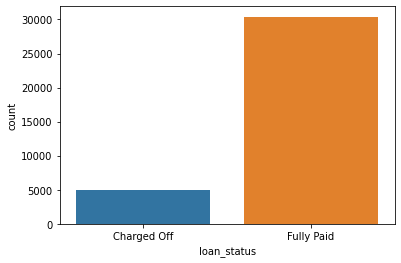

In [932]:
sns.countplot(x= master["loan_status"])
plt.show()

We see there are huge proportion of Fully paid rows than charged off this may imput some data count imbalance bias.

Lets create a group variable for loan_status column for eays segemnted univariate analysis

In [933]:
ls_grp = master.groupby('loan_status')

**Loan Amount** - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [934]:
master["loan_amnt"].describe()

count   35318.000
mean    11130.079
std      7324.274
min       500.000
25%      5500.000
50%     10000.000
75%     15000.000
max     35000.000
Name: loan_amnt, dtype: float64

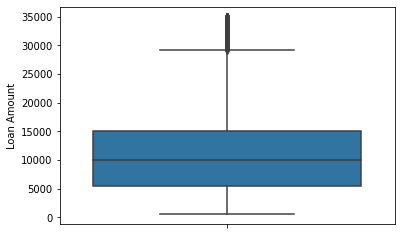

In [935]:
sns.boxplot( y=master["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()


The loan amount varies from 500 to 35,000 having median of 10,000. There are few outliers but we need not remove them as we are not dealing with this issue. The outliers might have some hidden information

In [936]:
ls_grp.loan_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,12280.629,8064.494,1000.000,6000.000,10000.000,17000.000,35000.000
Fully Paid,30384.000,10943.243,7179.653,500.000,5500.000,9600.000,15000.000,35000.000


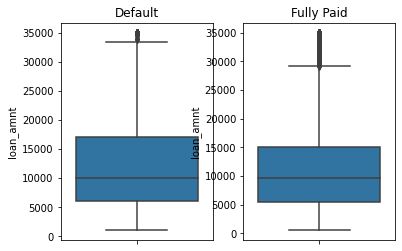

In [937]:
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=master[master.loan_status=='Charged Off'].loan_amnt)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=master[master.loan_status=='Fully Paid'].loan_amnt)
plt.show()

Both the categories have similar medians(representative value) and hence loan amnt cannot be used as deferentiating variable

**funded_amnt_inv** - The total amount committed by investors for that loan at that point in time

In [938]:
master["funded_amnt_inv"].describe()

count   35318.000
mean    10423.781
std      6966.207
min         0.000
25%      5000.000
50%      9000.000
75%     14300.000
max     35000.000
Name: funded_amnt_inv, dtype: float64

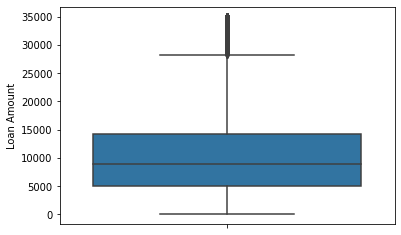

In [939]:
sns.boxplot( y=master["funded_amnt_inv"] )
plt.ylabel('Loan Amount')
plt.show()

The loan amount varies from 0 to 35,000 having median of 9,000.


In [940]:
ls_grp.funded_amnt_inv.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,11223.151,7605.030,0.000,5000.000,9854.120,15367.848,35000.000
Fully Paid,30384.000,10293.973,6848.189,0.000,5000.000,8975.000,14000.000,35000.000


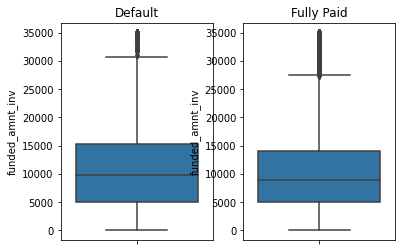

In [941]:
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=master[master.loan_status=='Charged Off'].funded_amnt_inv)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=master[master.loan_status=='Fully Paid'].funded_amnt_inv)
plt.show()

Even funded_amnt_inv have similar median and hence loan amnt cannot be used as deferentiating variable


**Term** - The number of payments on the loan. Values are in months and can be either 36 or 60

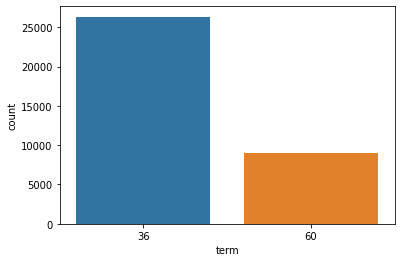

In [942]:
sns.countplot(x='term', data=master)
plt.show()


There are more number of loans with 36 months than 60 months

In [943]:
ls_grp.term.value_counts()/ls_grp.term.count()

loan_status  term
Charged Off  36     0.553
             60     0.447
Fully Paid   36     0.777
             60     0.223
Name: term, dtype: float64

In [944]:
master.groupby('term').loan_status.value_counts()/master.groupby('term').loan_status.count()

term  loan_status
36    Fully Paid    0.896
      Charged Off   0.104
60    Fully Paid    0.754
      Charged Off   0.246
Name: loan_status, dtype: float64

In [945]:
#To show percentage values for Hue count plot
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='count'>

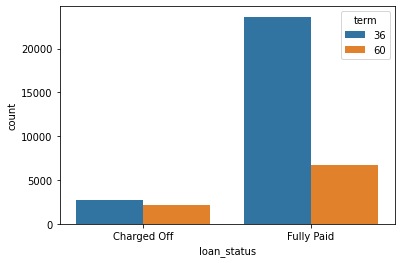

In [946]:
sns.countplot(x='loan_status', hue='term', data=master)

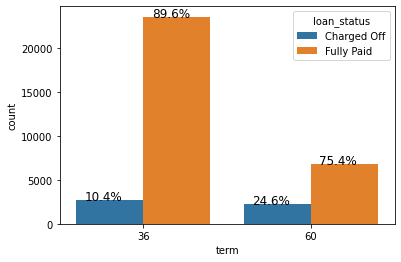

In [947]:
ax=sns.countplot(x='term', hue='loan_status', data=master)
with_hue(ax,master.term,2,2)

There are more number of Fully paid which are of 36 months than any other segemnts. Nearly 78% of Fully paid loans are with 36 months term period. Of all 36 month claims 90% are paid.

**int_rate** - Interest Rate on the loan

In [948]:
ls_grp.int_rate.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,13.931,3.649,5.420,11.490,13.790,16.450,24.400
Fully Paid,30384.000,11.667,3.613,5.420,8.590,11.490,14.090,24.110


Binning data of 0.5 range

In [949]:
b=[i for i in np.arange(5.0, 25.0, 0.5)]

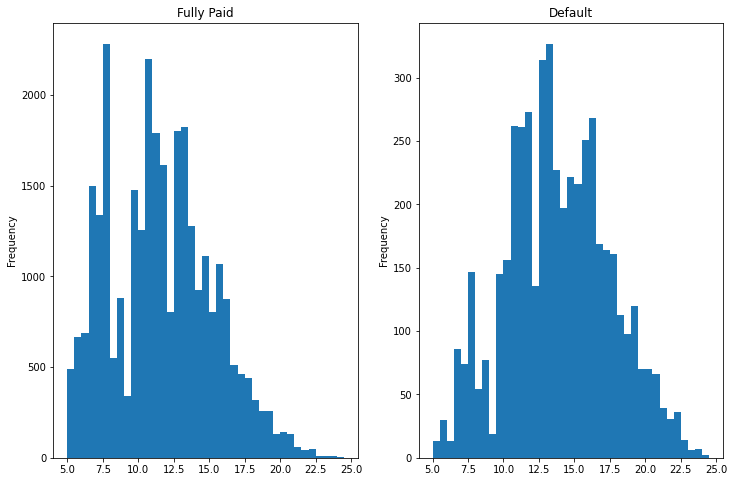

In [950]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Fully Paid')
master.loc[master.loan_status=='Fully Paid'].int_rate.plot.hist(bins=b)


plt.subplot(1,2,2)
plt.title('Default')
master.loc[master.loan_status=='Charged Off'].int_rate.plot.hist(bins=b)
plt.show()


Fully Paid loans are having more number of interest rates at interest rate 7.5-8 and 10.5-11 next <br>
Defaulted more when interest rate is around 11.00 - 15.00 <br>
So we can infer that fully paid loans are mostly at lower boundaries of interest rates and defaulted loans are more at middle values of interest rates

**installment**

In [951]:
master.installment.describe()

count   35318.000
mean      323.964
std       207.105
min        16.080
25%       167.833
50%       280.570
75%       426.470
max      1305.190
Name: installment, dtype: float64

In [952]:
ls_grp.installment.median()

loan_status
Charged Off   298.295
Fully Paid    278.230
Name: installment, dtype: float64

There is no much difference in installments for both the categories so there is no significant information

**grade**

In [953]:
(master['grade'].value_counts(normalize=True)*100).sort_index()

A   25.842
B   30.305
C   20.304
D   13.186
E    7.013
F    2.551
G    0.798
Name: grade, dtype: float64

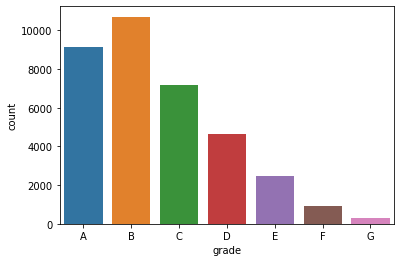

In [954]:
sns.countplot(x='grade', data=master.sort_values('grade'))
plt.show()

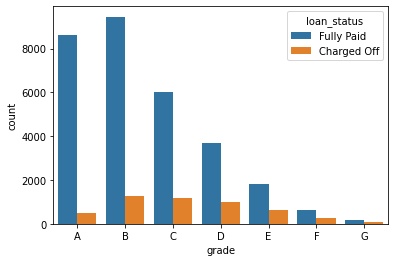

In [955]:
sns.countplot(x='grade', hue='loan_status', data=master.sort_values('grade'))
plt.show()

Most of the loans are graded A,B for Fully paid and B,C for Charged off

**Subgrade**

In [956]:
master.sub_grade.nunique()

35

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

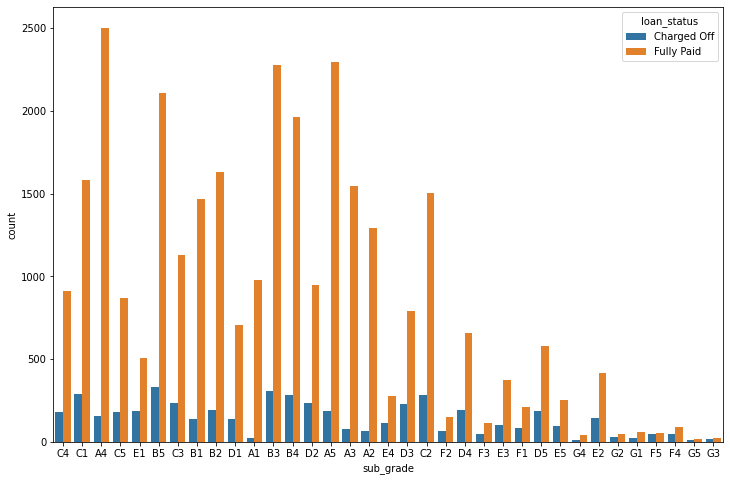

In [957]:
plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade', hue='loan_status', data=master)

Fully paid count bias is showing up hugely in this plot. Of Fully paid A4 has more number of loans and of Charged off B5 leads. But the counts are very comparative so we cannot take stern decision looking sub grade.

**emp_title**

In [958]:
master.emp_title.value_counts()

US Army                        128
Bank of America                106
IBM                             65
AT&T                            57
Kaiser Permanente               55
                              ... 
Schneider Finance                1
Shah Smith  and  Associates      1
friendship center golf cars      1
Crane 1 Services                 1
Fairfield Manufacturing          1
Name: emp_title, Length: 27381, dtype: int64

The spread of values if very huge so better inference cannot be made from this attribute

**emp_length**

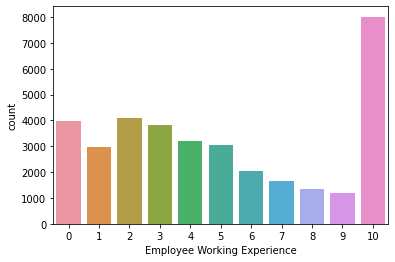

In [959]:
sns.countplot(x='emp_length', data=master)
plt.xlabel('Employee Working Experience')
plt.show()

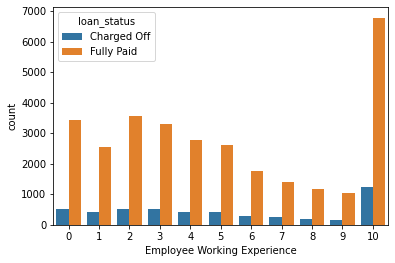

In [960]:
sns.countplot(x='emp_length',hue='loan_status', data=master)
plt.xlabel('Employee Working Experience')
plt.show()

In [961]:
ls_grp.emp_length.value_counts()/ls_grp.emp_length.count()

loan_status  emp_length
Charged Off  10           0.249
             2            0.107
             0            0.107
             3            0.106
             4            0.087
             5            0.085
             1            0.083
             6            0.058
             7            0.050
             8            0.039
             9            0.030
Fully Paid   10           0.223
             2            0.117
             0            0.113
             3            0.109
             4            0.091
             5            0.086
             1            0.084
             6            0.058
             7            0.046
             8            0.038
             9            0.034
Name: emp_length, dtype: float64

Majority of borrowers who applied for the loan have more than 10 years of experience. But from the graph above it is visible that the employees with 10 years are leading in both categories. In all other emp_lenths the percentages are comparative and hence this attribute doesnot categorise.

**Home ownership**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

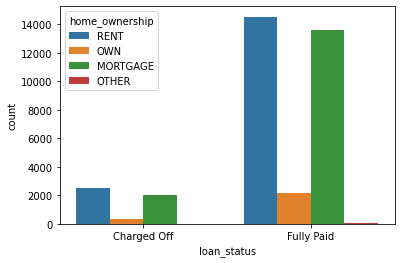

In [962]:
sns.countplot(x='loan_status',hue='home_ownership', data=master)

In [963]:
ls_grp.home_ownership.value_counts()/ls_grp.home_ownership.count()

loan_status  home_ownership
Charged Off  RENT             0.510
             MORTGAGE         0.417
             OWN              0.070
             OTHER            0.004
Fully Paid   RENT             0.478
             MORTGAGE         0.448
             OWN              0.071
             OTHER            0.002
Name: home_ownership, dtype: float64

<AxesSubplot:xlabel='loan_status,home_ownership'>

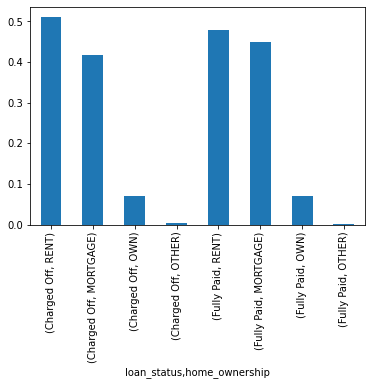

In [964]:
(ls_grp.home_ownership.value_counts()/ls_grp.home_ownership.count()).plot.bar()

There is no significant difference in percentage of four categories of Home ownership between Fully paid and Defaulted so this attribute cannot be used

**annual_inc**

In [965]:
ls_grp.annual_inc.median()

loan_status
Charged Off   54000.000
Fully Paid    60000.000
Name: annual_inc, dtype: float64

No significant difference

**verification_status**

In [966]:
master.verification_status.value_counts()

Not Verified       14822
Verified           11346
Source Verified     9150
Name: verification_status, dtype: int64

In [967]:
ls_grp.verification_status.value_counts()/ls_grp.verification_status.count()

loan_status  verification_status
Charged Off  Verified              0.374
             Not Verified          0.358
             Source Verified       0.268
Fully Paid   Not Verified          0.430
             Verified              0.313
             Source Verified       0.258
Name: verification_status, dtype: float64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

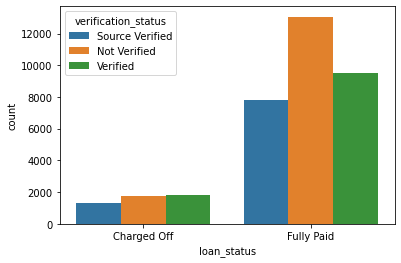

In [968]:
sns.countplot(x='loan_status',hue='verification_status', data=master)

<AxesSubplot:xlabel='verification_status,loan_status'>

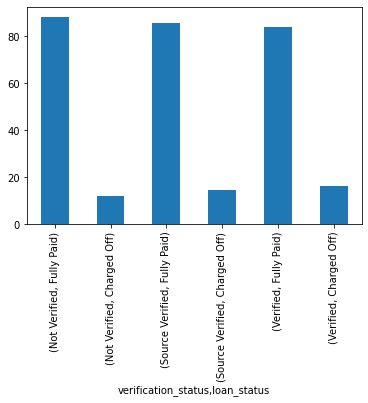

In [969]:
round(master.groupby('verification_status').loan_status.value_counts(normalize=True)*100,2).plot.bar()

Of Fully paid loans Not verified loans are with highest percentage and for Defaulted claims the verified claims are with large percentage which is very contradicting the purpose

<AxesSubplot:xlabel='verification_status', ylabel='count'>

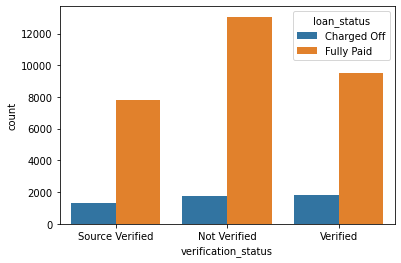

In [970]:
sns.countplot(x='verification_status',hue='loan_status', data=master)

Of all Not verfied claims 88% are Fully paid(The huge difference in percentage can be due to count difference in the categories paid and defaulted)

**issue_d**

<AxesSubplot:xlabel='issue_d_year,loan_status'>

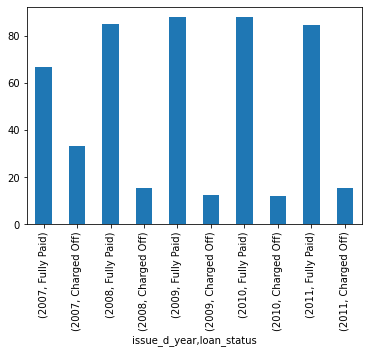

In [971]:
round(master.groupby('issue_d_year').loan_status.value_counts(normalize=True)*100,2).plot.bar()

Of all the years 2010 has more Fully paid claims. The number of loans increased for each year along with defaulted claims.

<AxesSubplot:xlabel='issue_d_month,loan_status'>

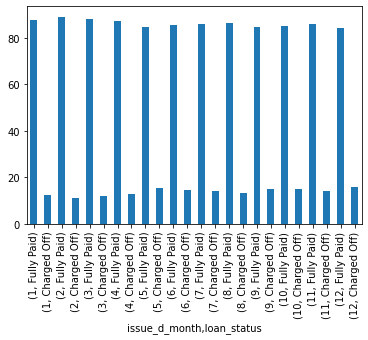

In [972]:
round(master.groupby('issue_d_month').loan_status.value_counts(normalize=True)*100,2).plot.bar()

Of all the months loans issued in February are more Fully paid and December has more defaulted claims even though graph of counts is not depecting the same

**purpose**

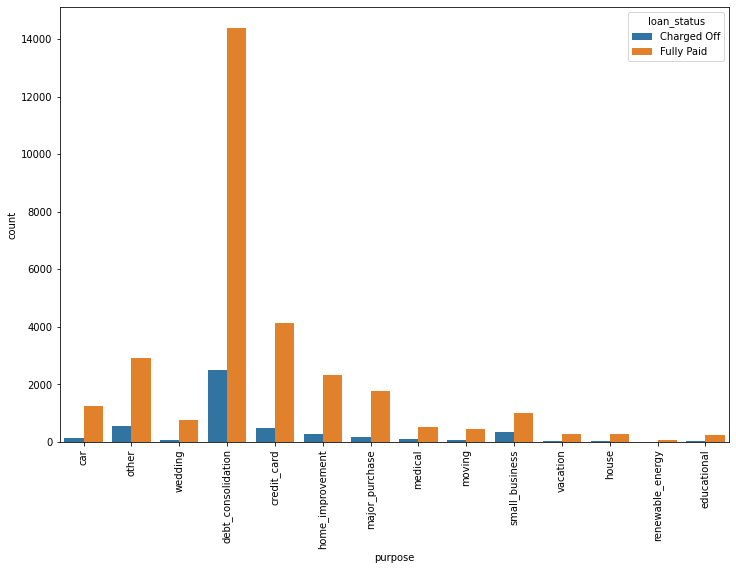

In [973]:
plt.figure(figsize=(12,8))
sns.countplot(x='purpose',hue='loan_status', data=master)
plt.xticks(rotation=90)
plt.show()

In [974]:
round(master.groupby('purpose').loan_status.value_counts(normalize=True)*100,2)

purpose             loan_status
car                 Fully Paid    89.370
                    Charged Off   10.630
credit_card         Fully Paid    89.650
                    Charged Off   10.350
debt_consolidation  Fully Paid    85.170
                    Charged Off   14.830
educational         Fully Paid    83.700
                    Charged Off   16.300
home_improvement    Fully Paid    88.720
                    Charged Off   11.280
house               Fully Paid    84.240
                    Charged Off   15.760
major_purchase      Fully Paid    90.350
                    Charged Off    9.650
medical             Fully Paid    84.700
                    Charged Off   15.300
moving              Fully Paid    84.890
                    Charged Off   15.110
other               Fully Paid    84.220
                    Charged Off   15.780
renewable_energy    Fully Paid    82.560
                    Charged Off   17.440
small_business      Fully Paid    73.660
                    Charg

<AxesSubplot:xlabel='purpose,loan_status'>

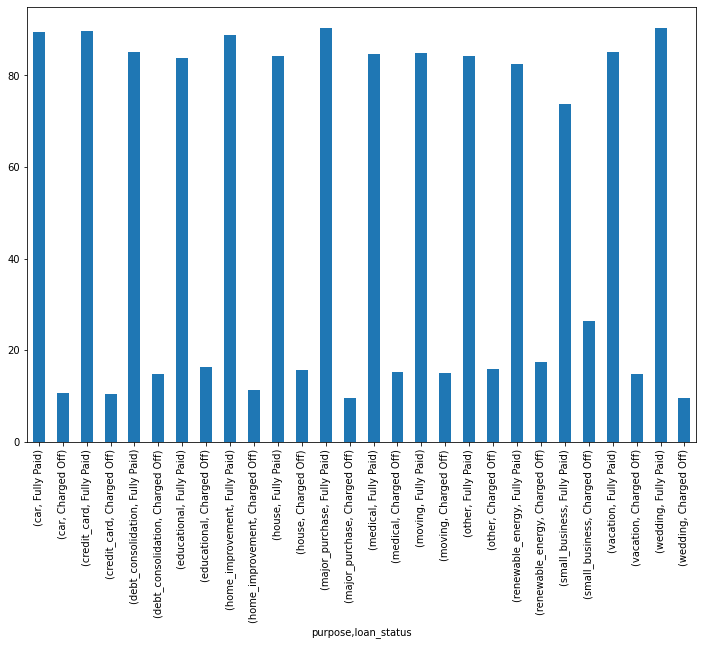

In [975]:
plt.figure(figsize=(12,8))
round(master.groupby('purpose').loan_status.value_counts(normalize=True)*100,2).plot.bar()

The loans sanctioned for the purpose of wedding and major purpose has more fully paid percentage with 90%  and sanctioned for Education has nearly 16% default percentage (The count of loans given for education are very less so the percentage is showing very huge)

**addr_state**

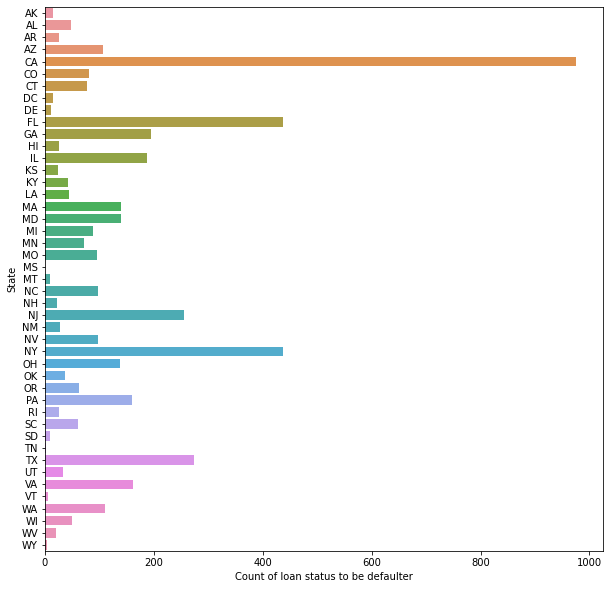

In [976]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

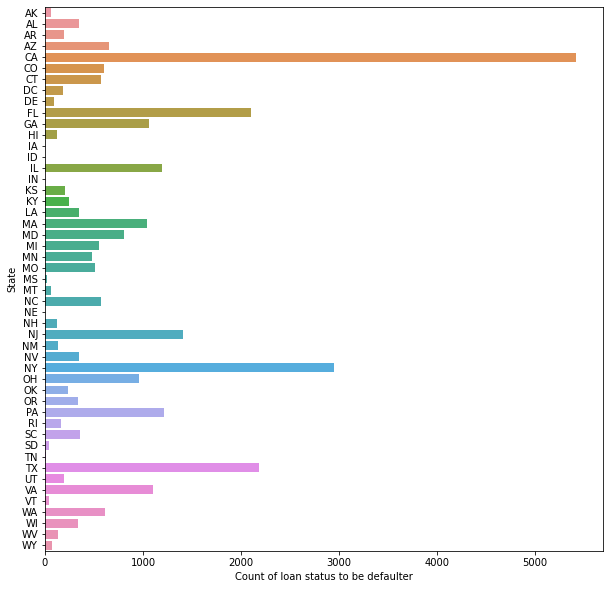

In [977]:
h = df[df['loan_status']=='Fully Paid'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=h)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

The loan takers from **CA** state are high in Fully paid and Defaulters also and also both the graphs looks almost similar irrespective of scales so the state is not showing any significant difference

**dti**

In [978]:
ls_grp.dti.median()

loan_status
Charged Off   14.440
Fully Paid    13.350
Name: dti, dtype: float64

The dti is not able to biffercate the loan_status column

**delinq_2yrs:** The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [979]:
master.delinq_2yrs.value_counts()

0     31488
1      2937
2       613
3       188
4        53
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [980]:
round(master.groupby('loan_status').delinq_2yrs.value_counts(normalize=True)*100,4)

loan_status  delinq_2yrs
Charged Off  0             88.083
             1              8.776
             2              2.270
             3              0.507
             4              0.243
             5              0.061
             6              0.020
             7              0.020
             8              0.020
Fully Paid   0             89.330
             1              8.241
             2              1.649
             3              0.536
             4              0.135
             5              0.059
             6              0.030
             7              0.010
             8              0.003
             9              0.003
             11             0.003
Name: delinq_2yrs, dtype: float64

In both the categories the high percentage is taken by 0 number of delinquencies in past 2 years. The percentages are almost similar again.

**earliest_cr_line**

In [981]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(round(master.groupby('earliest_cr_line_year').loan_status.value_counts(normalize=True)*100,2))

earliest_cr_line_year  loan_status
1969                   Fully Paid    95.450
                       Charged Off    4.550
1970                   Fully Paid    88.570
                       Charged Off   11.430
1971                   Fully Paid    90.910
                       Charged Off    9.090
1972                   Fully Paid    82.760
                       Charged Off   17.240
1973                   Fully Paid    82.050
                       Charged Off   17.950
1974                   Fully Paid    91.840
                       Charged Off    8.160
1975                   Fully Paid    89.470
                       Charged Off   10.530
1976                   Fully Paid    95.710
                       Charged Off    4.290
1977                   Fully Paid    89.660
                       Charged Off   10.340
1978                   Fully Paid    88.890
                       Charged Off   11.110
1979                   Fully Paid    78.950
                       Charged Off   21.0

<AxesSubplot:xlabel='earliest_cr_line_month,loan_status'>

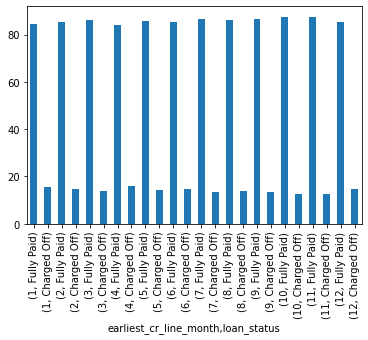

In [982]:
round(master.groupby('earliest_cr_line_month').loan_status.value_counts(normalize=True)*100,2).plot.bar()

Of all the years 1976 has more Fully paid claims 1979 has more defaulted claims. In months October and November has more Fully paids and April has more defaults

**inq_last_6mths:**	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [983]:
master.inq_last_6mths.describe()

count   35318.000
mean        0.867
std         1.065
min         0.000
25%         0.000
50%         1.000
75%         1.000
max         8.000
Name: inq_last_6mths, dtype: float64

In [984]:
ls_grp.inq_last_6mths.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,1.047,1.138,0.000,0.000,1.000,2.000,8.000
Fully Paid,30384.000,0.838,1.049,0.000,0.000,1.000,1.000,8.000


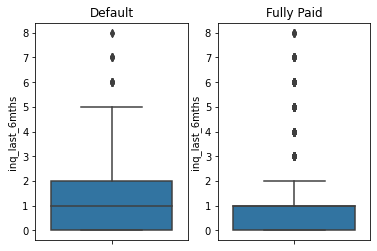

In [985]:
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=master[master.loan_status=='Charged Off'].inq_last_6mths)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=master[master.loan_status=='Fully Paid'].inq_last_6mths)
plt.show()

Fully Paid claims have very less number of enquired when compared to Default (the upper quartile range is more for Default with 2 inquiries in past 6 months)

Of all the months loans issued in February are more Fully paid and December has more defaulted claims even though graph of counts is not depecting the same

**open_acc:** The number of open credit lines in the borrower's credit file

In [986]:
ls_grp.open_acc.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,9.303,4.492,2.000,6.000,9.000,12.000,38.000
Fully Paid,30384.000,9.335,4.355,2.000,6.000,9.000,12.000,44.000


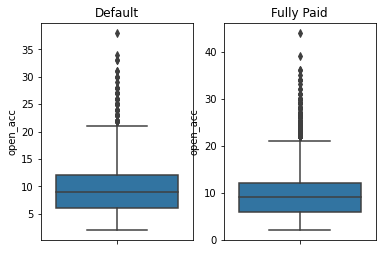

In [987]:
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=master[master.loan_status=='Charged Off'].open_acc)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=master[master.loan_status=='Fully Paid'].open_acc)
plt.show()

No significant difference

**pub_rec:**	Number of derogatory public records

<AxesSubplot:xlabel='pub_rec,loan_status'>

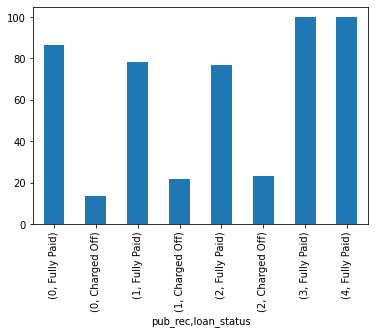

In [988]:
round(master.groupby('pub_rec').loan_status.value_counts(normalize=True)*100,2).plot.bar()

Less number of public derogatory records more percentage of fully paid (the last two bars are ouliers with only a single record). People with 0 public derogatory records are more able to pay the full loan taken

**revol_bal:**	Total credit revolving balance

In [989]:
master.revol_bal.describe()

count    35318.000
mean     13357.250
std      15669.837
min          0.000
25%       3777.500
50%       8930.000
75%      17051.000
max     149588.000
Name: revol_bal, dtype: float64

In [990]:
ls_grp.revol_bal.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,13652.479,14727.976,0.000,4245.750,9556.000,17799.250,147365.000
Fully Paid,30384.000,13309.309,15817.202,0.000,3707.500,8828.000,16930.250,149588.000


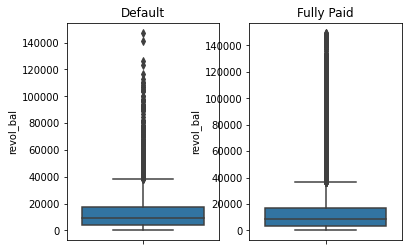

In [991]:
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=master[master.loan_status=='Charged Off'].revol_bal)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=master[master.loan_status=='Fully Paid'].revol_bal)
plt.show()

There is no huge difference in mean but in all quartiles and means the Charge off has more amount than fully paid so less revol_bal proportional to Payment

**total_acc:**	The total number of credit lines currently in the borrower's credit file

In [992]:
master.total_acc.value_counts()

17    1299
15    1295
14    1294
20    1292
16    1284
      ... 
90       1
81       1
72       1
87       1
2        1
Name: total_acc, Length: 79, dtype: int64

In [993]:
ls_grp.total_acc.value_counts()

loan_status  total_acc
Charged Off  14           202
             16           192
             15           180
             17           179
             11           172
                         ... 
Fully Paid   78             1
             80             1
             81             1
             87             1
             90             1
Name: total_acc, Length: 141, dtype: int64

In [994]:
ls_grp.total_acc.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,21.715,11.433,2.000,13.000,20.000,29.000,70.000
Fully Paid,30384.000,22.283,11.396,3.000,14.000,21.000,29.000,90.000


No significant difference

**out_prncp,out_prncp_inv:**	Remaining outstanding principal for total amount funded

In [995]:
master.out_prncp.unique()

array([0.])

In [996]:
master.out_prncp.value_counts()

0.000    35318
Name: out_prncp, dtype: int64

In [997]:
master.out_prncp_inv.value_counts()

0.000    35318
Name: out_prncp_inv, dtype: int64

Both the fields became empty after cleaning so we can remove these columns

In [998]:
master.drop('out_prncp',axis=1,inplace=True)
master.drop('out_prncp_inv',axis=1,inplace=True)

In [999]:
master.shape

(35318, 42)

**revol_util**	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [1000]:
master.revol_util.describe()

count   35318.000
mean       49.138
std        28.227
min         0.000
25%        25.900
50%        49.700
75%        72.600
max        99.900
Name: revol_util, dtype: float64

In [1001]:
ls_grp.revol_util.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,56.148,27.655,0.000,35.400,59.250,79.200,99.900
Fully Paid,30384.000,48.000,28.155,0.000,24.500,48.200,71.200,99.900


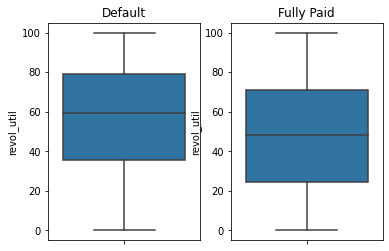

In [1002]:
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=master[master.loan_status=='Charged Off'].revol_util)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=master[master.loan_status=='Fully Paid'].revol_util)
plt.show()

Fully paid loans have less revol_util when compare to Defaulted by nearly 10% 

**total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee** All these attributes are having huge values for Fully Paid segment so segemented univariate analysis is not applicable for this

In [1003]:
master.total_pymnt.describe()

count   35318.000
mean    12016.812
std      8812.960
min        33.730
25%      5601.352
50%      9862.790
75%     16294.895
max     58563.680
Name: total_pymnt, dtype: float64

In [1004]:
ls_grp.total_pymnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,7014.095,6687.675,33.730,2319.905,4982.800,9464.282,51745.450
Fully Paid,30384.000,12829.194,8848.462,578.770,6242.153,10819.590,17111.825,58563.680


In [1005]:
ls_grp.loan_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,12280.629,8064.494,1000.000,6000.000,10000.000,17000.000,35000.000
Fully Paid,30384.000,10943.243,7179.653,500.000,5500.000,9600.000,15000.000,35000.000


In [1006]:
master.total_pymnt_inv.describe()

count   35318.000
mean    11540.776
std      8668.021
min         0.000
25%      5318.427
50%      9393.605
75%     15611.792
max     58563.680
Name: total_pymnt_inv, dtype: float64

In [1007]:
ls_grp.total_pymnt_inv.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,6646.167,6562.053,0.000,2069.503,4629.845,8938.100,51671.580
Fully Paid,30384.000,12335.603,8707.603,0.000,5946.782,10287.935,16482.085,58563.680


In [1008]:
master.total_rec_prncp.describe()

count   35318.000
mean     9764.710
std      6996.632
min         0.000
25%      4750.000
50%      8000.000
75%     13500.000
max     35000.020
Name: total_rec_prncp, dtype: float64

In [1009]:
ls_grp.total_rec_prncp.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,4054.057,4007.727,0.000,1266.223,2785.410,5399.712,31115.810
Fully Paid,30384.000,10692.052,6938.211,500.000,5400.000,9500.000,14700.000,35000.020


In [1010]:
master.total_rec_int.describe()

count   35318.000
mean     2155.930
std      2408.392
min         6.220
25%       662.142
50%      1331.555
75%      2722.162
max     23563.680
Name: total_rec_int, dtype: float64

In [1011]:
ls_grp.total_rec_int.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,2276.722,2579.706,11.230,596.065,1358.335,2923.210,22122.300
Fully Paid,30384.000,2136.315,2378.875,6.220,671.575,1327.810,2689.863,23563.680


In [1012]:
master.total_rec_late_fee.describe()

count   35318.000
mean        1.307
std         7.093
min         0.000
25%         0.000
50%         0.000
75%         0.000
max       180.200
Name: total_rec_late_fee, dtype: float64

In [1013]:
ls_grp.total_rec_late_fee.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,4.260,12.826,0.000,0.000,0.000,0.000,180.200
Fully Paid,30384.000,0.827,5.488,0.000,0.000,0.000,0.000,165.690


**recoveries:**	post charge off gross recovery - this attribute will have 0 value for Fully paid as it is related to charged off

In [1014]:
master.recoveries.describe()

count   35318.000
mean       94.866
std       688.264
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     29623.350
Name: recoveries, dtype: float64

In [1015]:
ls_grp.recoveries.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,679.056,1730.506,0.000,9.562,179.555,610.300,29623.350
Fully Paid,30384.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Ofbously this will be zero for Fully paid idiot

In [1016]:
master.collection_recovery_fee.describe()

count   35318.000
mean       11.895
std       142.125
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      7002.190
Name: collection_recovery_fee, dtype: float64

In [1017]:
ls_grp.collection_recovery_fee.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,85.147,371.989,0.000,0.000,2.580,9.530,7002.190
Fully Paid,30384.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


**last_pymnt_d**

Correcting the format

In [1018]:
master.last_pymnt_d=master.last_pymnt_d.apply(lambda x:dt.datetime.strptime(x, "%Y-%m-%d"))

In [1019]:
master['last_pymnt_d_month']= master['last_pymnt_d'].dt.month
master['last_pymnt_d_year']= master['last_pymnt_d'].dt.year

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


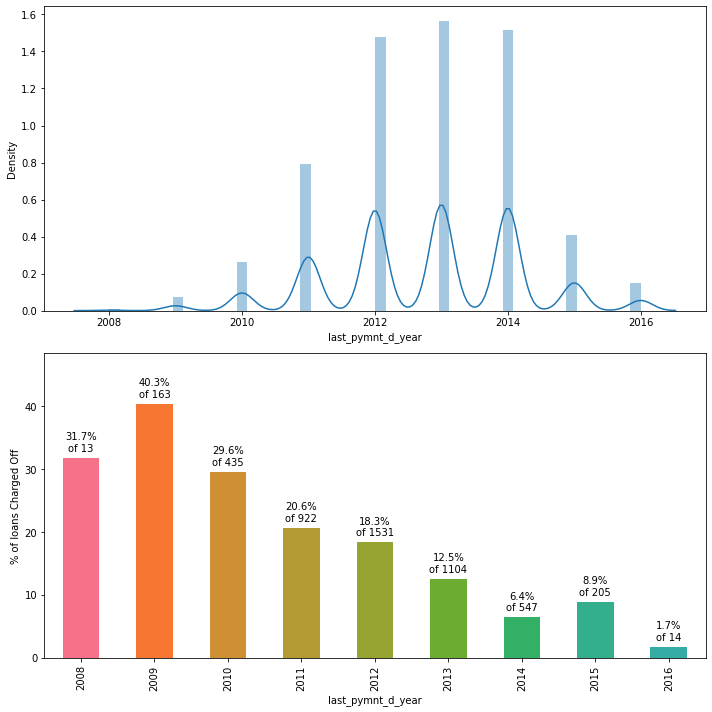

In [1020]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
sns.distplot(master['last_pymnt_d_year'])

plt.subplot(2, 1, 2)
plotLoanStatus(master,'last_pymnt_d_year')
plt.show()

Of all the loans the once with last payment in 2009 has more default percentage and 2016 least which is because of less number of claims available else we can say 2014 the least. We can furthur analyse why 2009 have more defaults (if there is any business change or other economic factors)

**last_pymnt_amnt**

In [1021]:
master.last_pymnt_amnt.describe()

count   35318.000
mean     2813.840
std      4522.421
min         0.010
25%       224.778
50%       602.500
75%      3604.543
max     36115.200
Name: last_pymnt_amnt, dtype: float64

In [1022]:
ls_grp.last_pymnt_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,329.593,514.561,0.010,119.535,244.045,408.918,12818.380
Fully Paid,30384.000,3217.252,4750.334,0.160,263.663,912.985,4382.738,36115.200


Converting the last_pymnt_amnt to log scale for letter plotting as the range is huge

In [1023]:
master['last_pymnt_amnt_log'] = master['last_pymnt_amnt'].apply(lambda x : np.log(x))

In [1024]:
master['last_pymnt_amnt_log'].describe()

count   35318.000
mean        6.657
std         1.792
min        -4.605
25%         5.415
50%         6.401
75%         8.190
max        10.494
Name: last_pymnt_amnt_log, dtype: float64

<AxesSubplot:>

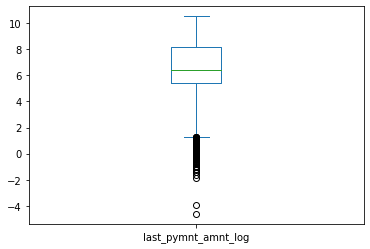

In [1025]:
master['last_pymnt_amnt_log'].plot.box()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

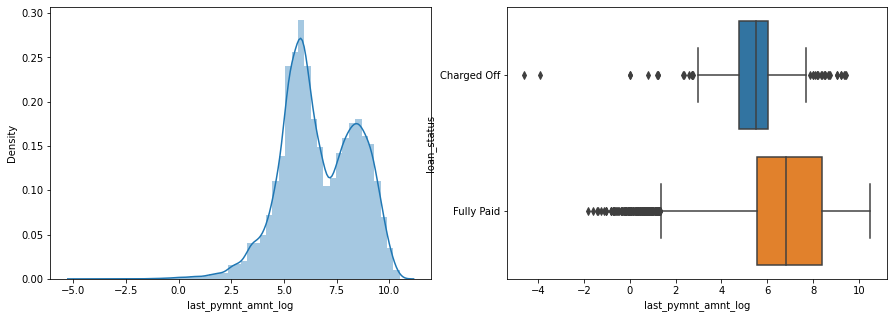

In [1026]:
plt.figure(figsize=(15,5))

plot_distribution(master, 'last_pymnt_amnt_log')
plt.show()

There are more claims with last payment amount at lower quartiles with low range. Charge off has less median than Fully paid. 

**last_credit_pull_d** - The most recent month LC pulled credit for this loan

In [1027]:
master.last_credit_pull_d

0        2013-09-01
1        2016-04-01
3        2016-01-01
4        2016-05-01
5        2014-12-01
            ...    
36378    2014-05-01
36379    2008-08-01
36380    2016-05-01
36381    2010-03-01
36382    2010-07-01
Name: last_credit_pull_d, Length: 35318, dtype: object

In [1028]:
master.last_credit_pull_d=master.last_credit_pull_d.apply(lambda x:dt.datetime.strptime(x, "%Y-%m-%d"))

In [1029]:
master['last_credit_pull_d_month']= master['last_credit_pull_d'].dt.month
master['last_credit_pull_d_year']= master['last_credit_pull_d'].dt.year

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


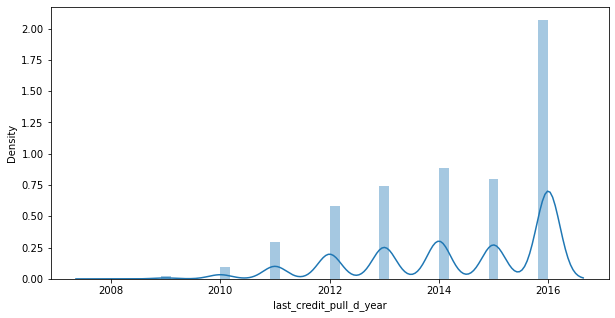

In [1030]:
plt.figure(figsize=(10,5))
sns.distplot(master['last_credit_pull_d_year'])
plt.show()

**pub_rec_bankruptcies**

In [1031]:
round(ls_grp.pub_rec_bankruptcies.value_counts(normalize=True)*100,2)

loan_status  pub_rec_bankruptcies
Charged Off  0.000                  93.680
             1.000                   6.280
             2.000                   0.040
Fully Paid   0.000                  96.220
             1.000                   3.780
             2.000                   0.010
Name: pub_rec_bankruptcies, dtype: float64

<AxesSubplot:xlabel='pub_rec_bankruptcies,loan_status'>

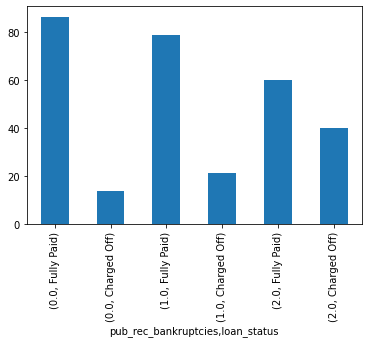

In [1032]:
round(master.groupby('pub_rec_bankruptcies').loan_status.value_counts(normalize=True)*100,2).plot.bar()

As the number of public record Bankruptcies increases the Fully paid percentage is reducing which is in sync with general conception

## Bivariate Analysis

**Loan amount vs Annual Income**

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ratio', ylabel='Density'>

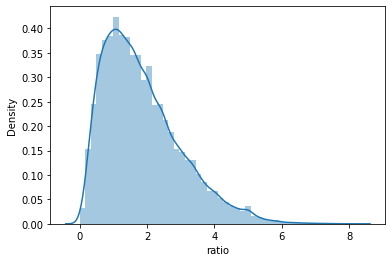

In [1033]:
master['ratio'] = master['loan_amnt'] * 10 / master['annual_inc']
sns.distplot(master['ratio'])

In [1034]:
master.ratio.describe()

count   35318.000
mean        1.854
std         1.142
min         0.008
25%         0.983
50%         1.630
75%         2.500
max         8.197
Name: ratio, dtype: float64

In [1035]:
ls_grp.ratio.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4934.000,2.193,1.293,0.052,1.167,2.000,3.000,8.197
Fully Paid,30384.000,1.799,1.106,0.008,0.960,1.584,2.418,7.738


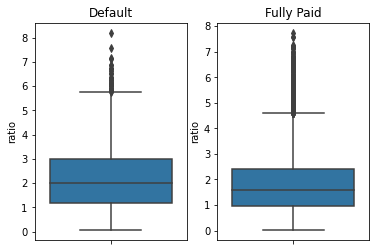

In [1036]:
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=master[master.loan_status=='Charged Off'].ratio)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=master[master.loan_status=='Fully Paid'].ratio)
plt.show()

Even though most loans are present with 16% of annual income. The Defaulted loans have higher ratio(20%) than Fully paid(16%).

<AxesSubplot:xlabel='ratio_bin', ylabel='% of loans Charged Off'>

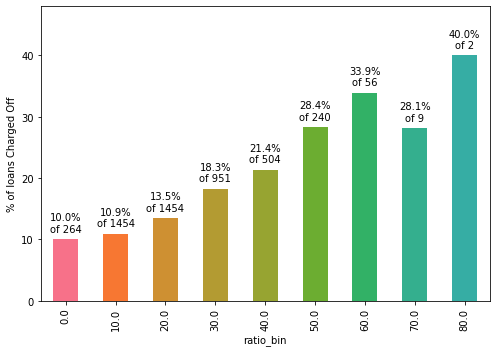

In [1037]:
master['ratio_bin'] = round(master['ratio'],0) * 10
plt.figure(figsize=(7,5))
plotLoanStatus(master, 'ratio_bin')

loans with loan amount taking more amount of annual income are more likely to get defaulted

**Loan Amount vs other attribute**

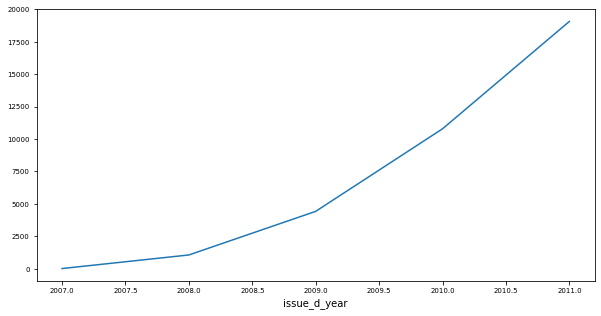

In [1038]:
plt.figure(figsize=(10,5))
master.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

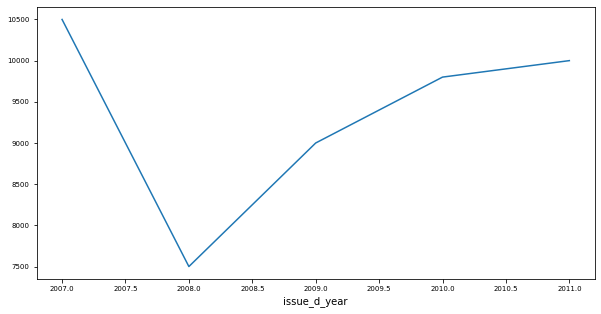

In [1039]:
plt.figure(figsize=(10,5))
master.groupby('issue_d_year').loan_amnt.median().plot(kind='line', fontsize=7)
plt.show()

Even though number of issued loans increased with each year, 2008 has the least median loan amount issued compared to other years.

In [1040]:
pd.set_option('display.float_format',lambda x:'%.3f' % x)
master['annual_inc'].describe()

count     35318.000
mean      69067.115
std       63958.858
min        4000.000
25%       41500.000
50%       60000.000
75%       82485.000
max     6000000.000
Name: annual_inc, dtype: float64

In [1041]:
#Outliers
print('Upper limit:',82485+1.5*(82485-41500))
print('lower limit:',41500-1.5*(82485-41500))

Upper limit: 143962.5
lower limit: -19977.5


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


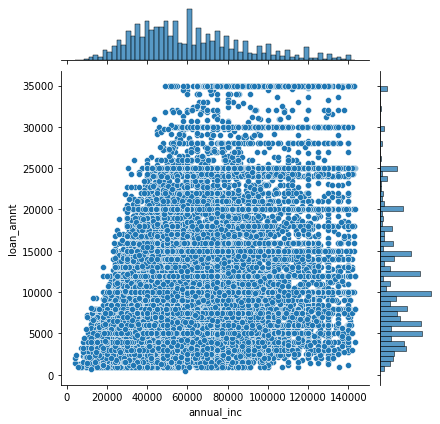

In [1042]:
#Rounded 143962.5 to 144000
sns.jointplot('annual_inc', 'loan_amnt', master.loc[master['annual_inc']<144000])
plt.show()

There are more loans taken where annual income between 40,000-60,000 and loan amount taken is around 5000

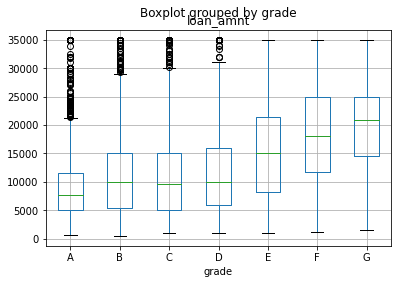

In [1043]:
master.boxplot(column='loan_amnt', by='grade')
plt.show()

As the grade increases the loan amount also increased which is basic understanding and from previous univariate analysis of grade it is shown that A,B more opted grade and hence the loans with low grade with less income levels are taken more by borrowers

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

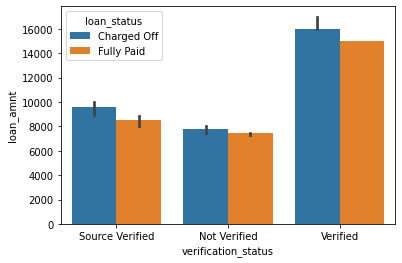

In [1044]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master, estimator=np.median)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

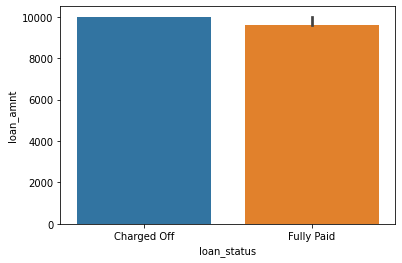

In [1045]:
sns.barplot(x='loan_status', y='loan_amnt', data=master, estimator=np.median)

Loans with huge amounts are verified followed by source verified loans for lower loans. But the verfication is not adding any value for recovery so the company has to improve its recovery process a lot.

**Int rate vs Other attributes**

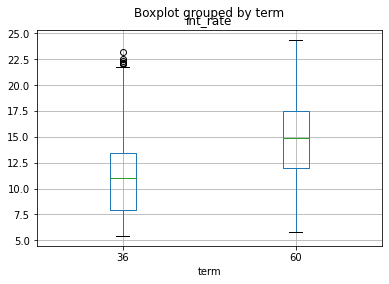

In [1046]:
master.boxplot(column='int_rate', by='term')
plt.show()

36 months have low interest rates may be that is why 36 months have more fully paid percentage

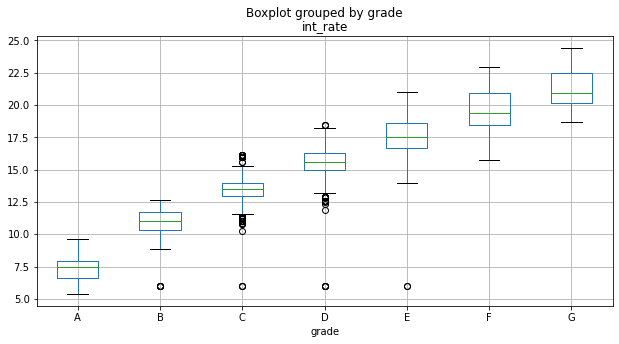

In [1047]:
master.boxplot(column='int_rate', by='grade',figsize=(10,5))
plt.show()

Lower graded loans have low interest rates and are most opted type of loans

<AxesSubplot:title={'center':'int_rate'}, xlabel='loan_status'>

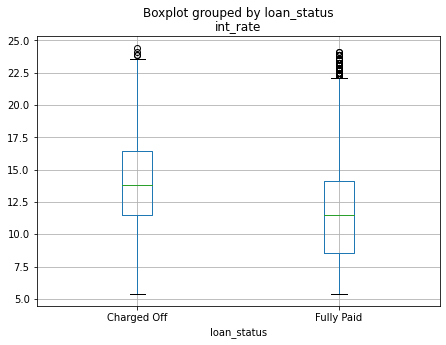

In [1048]:
master.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

Lower interest rate loans are more paid

**GRADE**

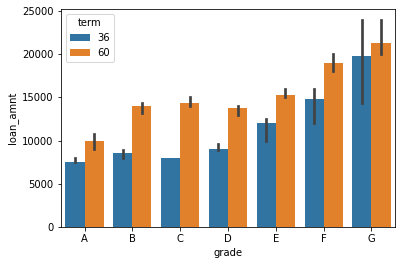

In [1049]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=master.sort_values('grade'), estimator=np.median)
plt.show()

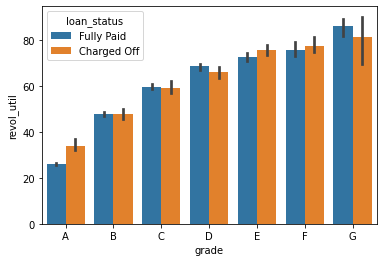

In [1050]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=master.sort_values('grade'), estimator=np.median)
plt.show()

<Figure size 1440x360 with 0 Axes>

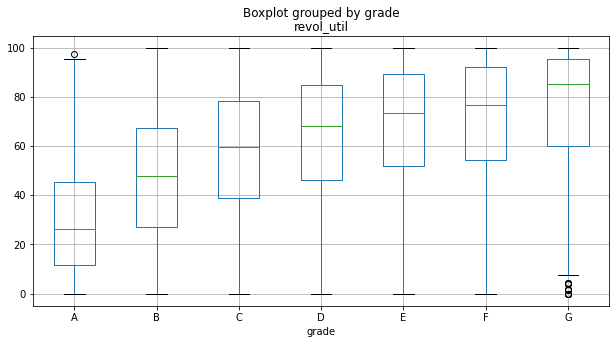

In [1051]:
plt.figure(figsize=(20,5))
master.boxplot(column='revol_util', by='grade',figsize=(10,5))
plt.show()

Revolving utilisation rate is more for high grades as to take huge amount of loan with high interest there must have been a huge need which is making the person to utilise the loan more than the lower grade loans

For lower grdes(less interest) there is more utilisation of credit for Defaulted claims as the amount is less than other grades and so the interest rate people are tending more to utilise the loan not thinking of defaulting in the higher grades as the amount and interest increases the tendency to use off more credit is reducing

In [1052]:
corr=master.corr()
corr['loan_amnt']

loan_amnt                   1.000
funded_amnt_inv             0.952
term                        0.350
int_rate                    0.300
installment                 0.931
emp_length                  0.145
annual_inc                  0.258
dti                         0.063
delinq_2yrs                -0.035
inq_last_6mths              0.010
open_acc                    0.174
pub_rec                    -0.047
revol_bal                   0.319
revol_util                  0.066
total_acc                   0.256
total_pymnt                 0.884
total_pymnt_inv             0.860
total_rec_prncp             0.849
total_rec_int               0.729
total_rec_late_fee          0.047
recoveries                  0.143
collection_recovery_fee     0.079
last_pymnt_amnt             0.478
pub_rec_bankruptcies       -0.030
earliest_cr_line_month     -0.017
earliest_cr_line_year      -0.197
issue_d_month               0.051
issue_d_year                0.116
last_pymnt_d_month         -0.005
last_pymnt_d_y

<AxesSubplot:>

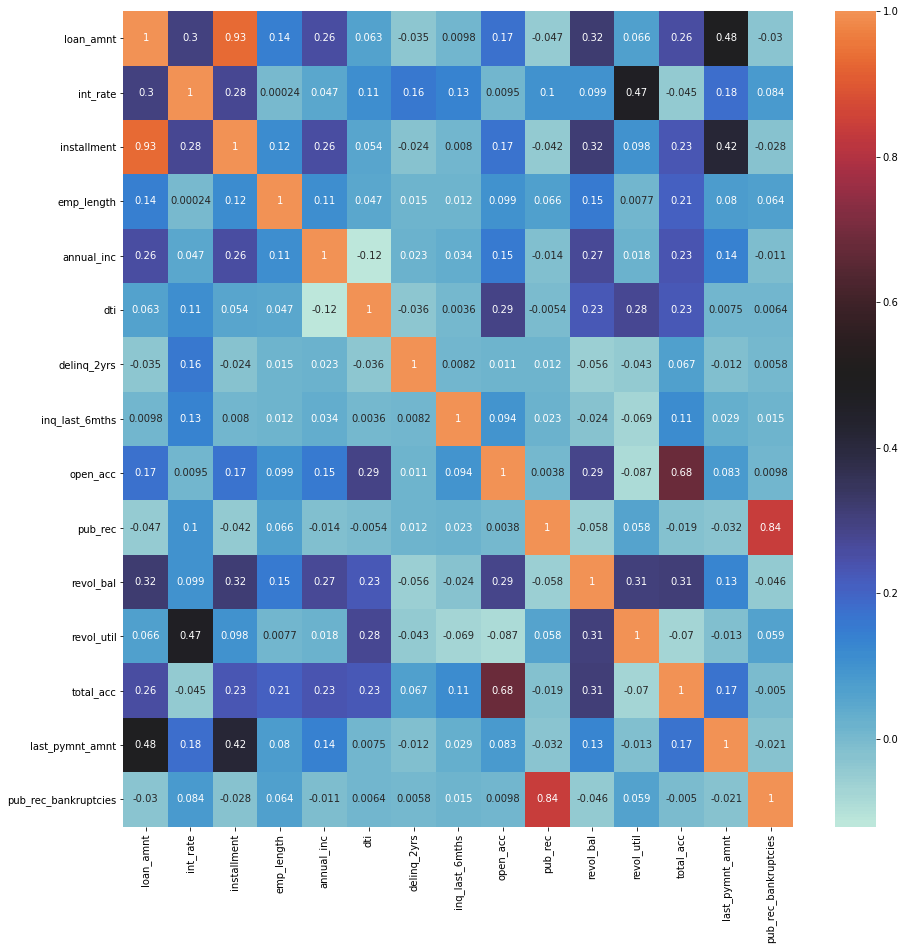

In [1053]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = master[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

**High correlations:**<br>
Loan amount - installement <br>
open accounts - total accounts <br>
Number of derogatory public records - public record bankruptcies <br>
loan amount - last payment amount <br>
interest amount - Revolving line utilization rate <br>
Installment - last payment amount <br>

There are no new interpretations from the heat map. Are are ofbious once like loan amount highly correlated with installement which has to be.

**delinq_2yrs vs other attributes**

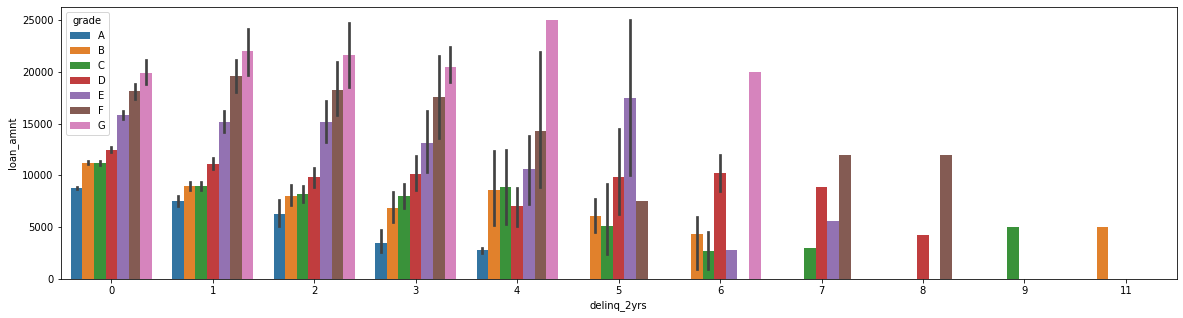

In [1054]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=master.sort_values('grade'), estimator=np.mean)
plt.show()

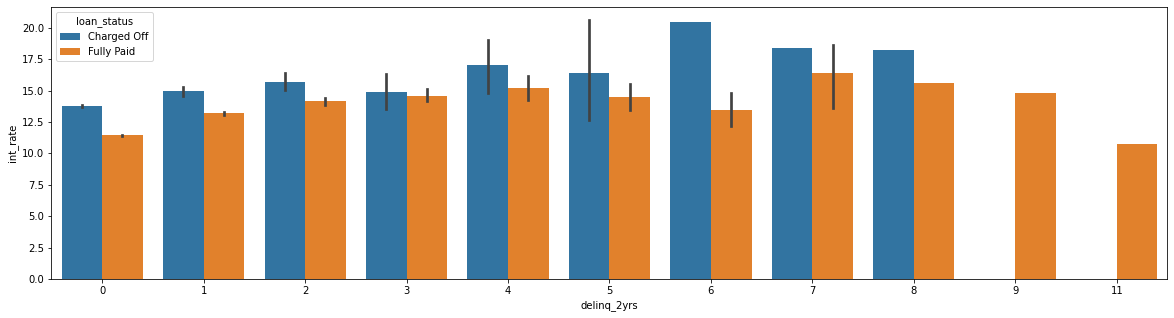

In [1055]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=master, estimator=np.mean)
plt.show()

<AxesSubplot:xlabel='delinq_2yrs', ylabel='count'>

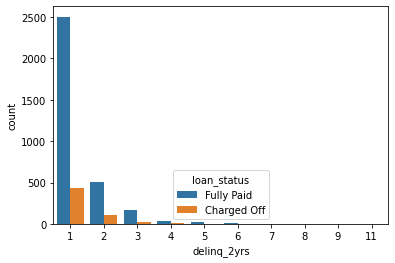

In [1056]:
sns.countplot(x='delinq_2yrs',hue='loan_status', data=master.loc[master.delinq_2yrs!=0])

It can be observed that the people with more deling_2yr value has more interest rate which is good as the person is assumend to be more risky by in the data it is also evident that high interest rates is having high loan amount as well. The high deling_2yr values have high Charge off percentage which may lead to more losses. Than the company can give low amounts with low interest for the people with more deling_2yr

So we need to avoid giving high grade loans for the people with more deling_2yr value.

**Term vs Last payment amount vs Loan status**

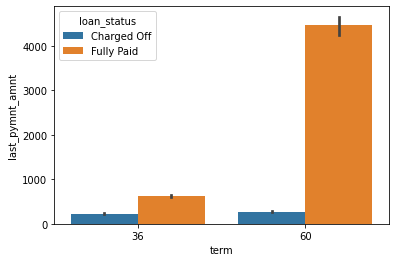

In [1057]:
sns.barplot(x='term', y='last_pymnt_amnt', hue="loan_status", data=master, estimator=np.median)
plt.show()

**Grade vs Term vs Last payment amount vs Loan status**

In [1058]:
y=pd.DataFrame({'last_paymnt' : master.groupby(['grade','term','loan_status']).last_pymnt_amnt.median()}).reset_index()

In [1059]:
y

,grade,term,loan_status,last_paymnt
0,A,36,Charged Off,190.630
1,A,36,Fully Paid,567.575
2,A,60,Charged Off,181.980
3,A,60,Fully Paid,1534.700
4,B,36,Charged Off,225.880
5,B,36,Fully Paid,653.640
6,B,60,Charged Off,216.130
7,B,60,Fully Paid,4190.805
8,C,36,Charged Off,212.715
9,C,36,Fully Paid,565.800


In [1060]:
g=list(master.grade.unique())
g=sorted(g)
t=list(master.term.unique())

In [1061]:
#calculating percentage of how less the defaulters pay their last payment when compared to Fully paid of same grade and term
print("Grade Term Percentage")
for j in t:
    for i in g:
        o=list(y.loc[(y['grade']==i) & (y['term']==j) & (y['loan_status']=='Charged Off')].last_paymnt)[0]
        p=list(y.loc[(y['grade']==i) & (y['term']==j) & (y['loan_status']=='Fully Paid')].last_paymnt)[0]
        print(i,j,round(((p-o)/p)*100,2))
        
        

Grade Term Percentage
A 60 88.14
B 60 94.84
C 60 94.17
D 60 94.31
E 60 94.32
F 60 93.68
G 60 94.93
A 36 66.41
B 36 65.44
C 36 62.4
D 36 63.77
E 36 62.13
F 36 52.51
G 36 36.77


<AxesSubplot:xlabel='grade,term,loan_status'>

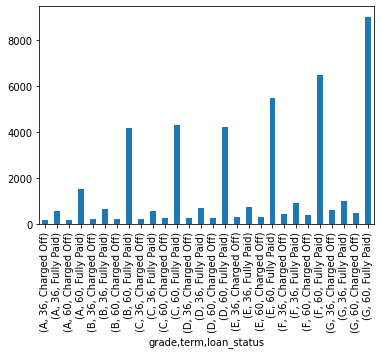

In [1062]:
master.groupby(['grade','term','loan_status']).last_pymnt_amnt.median().plot.bar()

When we categorise the people according to grade(as it is related to loan amount) <br>The defaulted borrowers of 36 months term are paying on average **62%** less than Fully paid borrowers of same grade and term.<br>
For the borrowers with 60 months term the defaulters are paying **94%** less last payment than Fully paid borrowers.